# Remove Background

In [21]:
import rembg
import timm
from PIL import Image

def remove_background(input_path, output_path):
    with open(input_path, "rb") as input_file, open(output_path, "wb") as output_file:
        input_data = input_file.read()
        output_data = rembg.remove(input_data)
        output_file.write(output_data)

# Specify input and output paths
input_image_path = "Bild1.png"
output_image_path = "BackgroundRemoved.png"

# Remove background
remove_background(input_image_path, output_image_path)

# Color Filter

True

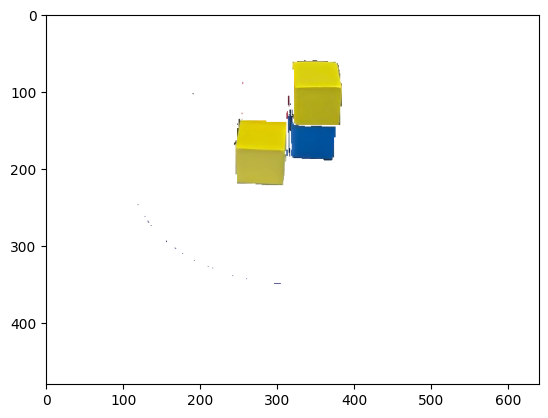

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('BackgroundRemoved.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Define ranges for red, blue, and yellow colors in HSV
lower_red = np.array([7, 209, 230])
upper_red = np.array([0, 255, 255])

lower_blue = np.array([35, 140, 60])
upper_blue = np.array([255, 255, 180])

lower_yellow = np.array([25, 50, 70])
upper_yellow = np.array([35, 255, 255])

# Create masks for each color
red_mask = cv2.inRange(hsv_img, lower_red, upper_red)
blue_mask = cv2.inRange(hsv_img, lower_blue, upper_blue)
yellow_mask = cv2.inRange(hsv_img, lower_yellow, upper_yellow)

# Combine the masks
combined_mask = cv2.bitwise_or(red_mask, blue_mask)
combined_mask = cv2.bitwise_or(combined_mask, yellow_mask)

# Create a mask for all colors except red, blue, and yellow
other_mask = cv2.bitwise_not(combined_mask)

# Set non-red, non-blue, and non-yellow pixels to white
result = img.copy()
result[other_mask != 0] = [255, 255, 255]
plt.imshow(result)


result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
cv2.imwrite("Cubes1.png", result)

# Depth Map

Using cache found in C:\Users\Silvan Mangold/.cache\torch\hub\intel-isl_MiDas_master
Using cache found in C:\Users\Silvan Mangold/.cache\torch\hub\intel-isl_MiDas_master


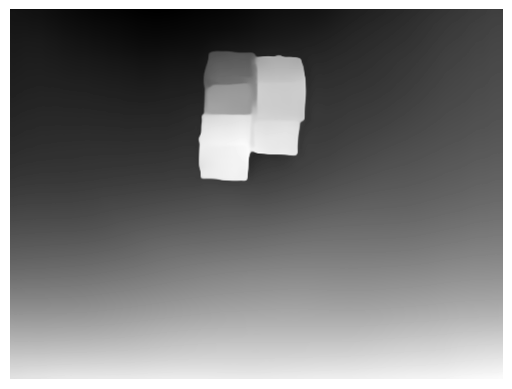

True

In [23]:
import cv2
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

filename = ("Cubes1.png")

model_type = "DPT_Large"
midas = torch.hub.load("intel-isl/MiDas", model_type)

midas_transforms = torch.hub.load("intel-isl/MiDas", "transforms")
if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform

device = torch.device("cpu")
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)


input_batch = transform(img).to(device)

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
    
output = prediction.cpu().numpy()

plt.imshow(output, cmap='gray')  # Using 'gray' colormap for grayscale visualization
plt.axis('off')
plt.show()

cv2.imwrite("DepthMap.png", output)

# Image Segmentation

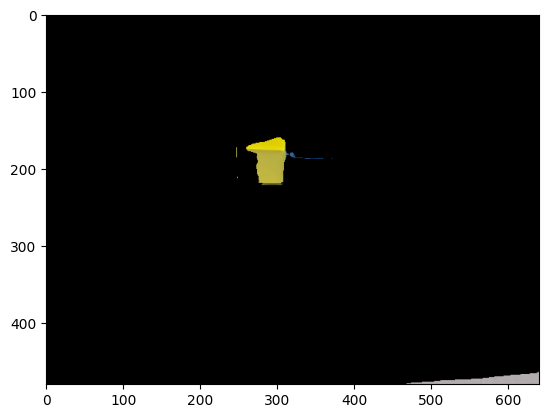

True

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

depth_map = cv2.imread("DepthMap.png", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("Bild1.png")

threshold_distance = 18

mask = depth_map < threshold_distance

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_rgb[mask] = [0, 0, 0]

plt.imshow(img_rgb)
plt.show()

img_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
cv2.imwrite("Result.png", img_rgb)